In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
annotations = pd.read_csv('./annotations_text.csv')
annotations

,Unnamed: 0,No.,Object name,Material,Stained,Surface properties
0,0,1,Christmas bear,['cloth'],['pluriform'],['']
1,1,2,Lab-keys,"['metal', 'cloth']",[''],"['composite', 'shiny']"
2,2,3,Apricot,['fruit'],['uniform'],['']
3,3,4,Round candle,"['candle', 'metal']",[''],"['composite', 'shiny']"
4,4,5,Nut,['wood'],['uniform'],['ribbed']
...,...,...,...,...,...,...
995,995,996,lotion,"['plastic', 'paper']",['pluriform'],"['shiny', 'composite']"
996,996,997,cleansing milk,"['plastic', 'paper']",['pluriform'],"['shiny', 'composite']"
997,997,998,vogue deodorant,"['metal', 'plastic']",['pluriform'],"['shiny', 'composite']"
998,998,999,ALOI recording,"['metal', 'plastic']",['uniform'],"['shiny', 'composite']"


In [3]:
#convert material string to list
def convert_to_list(x):
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.replace('\'','')
    x = x.replace('\'','')
    x = x.replace(' ','')
    x = x.split(',')
    return x

annotations['Material'] = annotations['Material'].apply(convert_to_list)

In [4]:
#list of all materials
materials = []
for i in annotations['Material']:
    materials.extend(i)
materials = list(set(materials))
materials

['',
 'foam',
 'glass',
 'flower',
 'cloth',
 'plastic',
 'herbs',
 'candle',
 'fruit',
 'stone',
 'feathers',
 'rubber',
 'pottery',
 'rope',
 'paper',
 'sponge',
 'copper',
 'vegetable',
 'wool',
 'iron',
 'plant',
 'wood',
 'shell',
 'food',
 'elastic',
 'velvet',
 'wire',
 'cotton',
 'cane',
 'metal']

In [18]:
#count of each material with double count
material_count = {}
for i in materials:
    material_count[i] = 0
for mat_list in annotations['Material']:
    for mat in mat_list:
        material_count[mat] += 1
material_count

{'': 6,
 'foam': 1,
 'glass': 68,
 'flower': 6,
 'cloth': 81,
 'plastic': 447,
 'herbs': 1,
 'candle': 11,
 'fruit': 29,
 'stone': 22,
 'feathers': 1,
 'rubber': 12,
 'pottery': 68,
 'rope': 22,
 'paper': 156,
 'sponge': 5,
 'copper': 2,
 'vegetable': 25,
 'wool': 1,
 'iron': 1,
 'plant': 3,
 'wood': 88,
 'shell': 13,
 'food': 13,
 'elastic': 1,
 'velvet': 1,
 'wire': 10,
 'cotton': 1,
 'cane': 1,
 'metal': 190}

In [21]:
#sort material count
material_count = sorted(material_count.items(), key=lambda x: x[1], reverse=True)
material_count

[('plastic', 447),
 ('metal', 190),
 ('paper', 156),
 ('wood', 88),
 ('cloth', 81),
 ('glass', 68),
 ('pottery', 68),
 ('fruit', 29),
 ('vegetable', 25),
 ('stone', 22),
 ('rope', 22),
 ('shell', 13),
 ('food', 13),
 ('rubber', 12),
 ('candle', 11),
 ('wire', 10),
 ('', 6),
 ('flower', 6),
 ('sponge', 5),
 ('plant', 3),
 ('copper', 2),
 ('foam', 1),
 ('herbs', 1),
 ('feathers', 1),
 ('wool', 1),
 ('iron', 1),
 ('elastic', 1),
 ('velvet', 1),
 ('cotton', 1),
 ('cane', 1)]

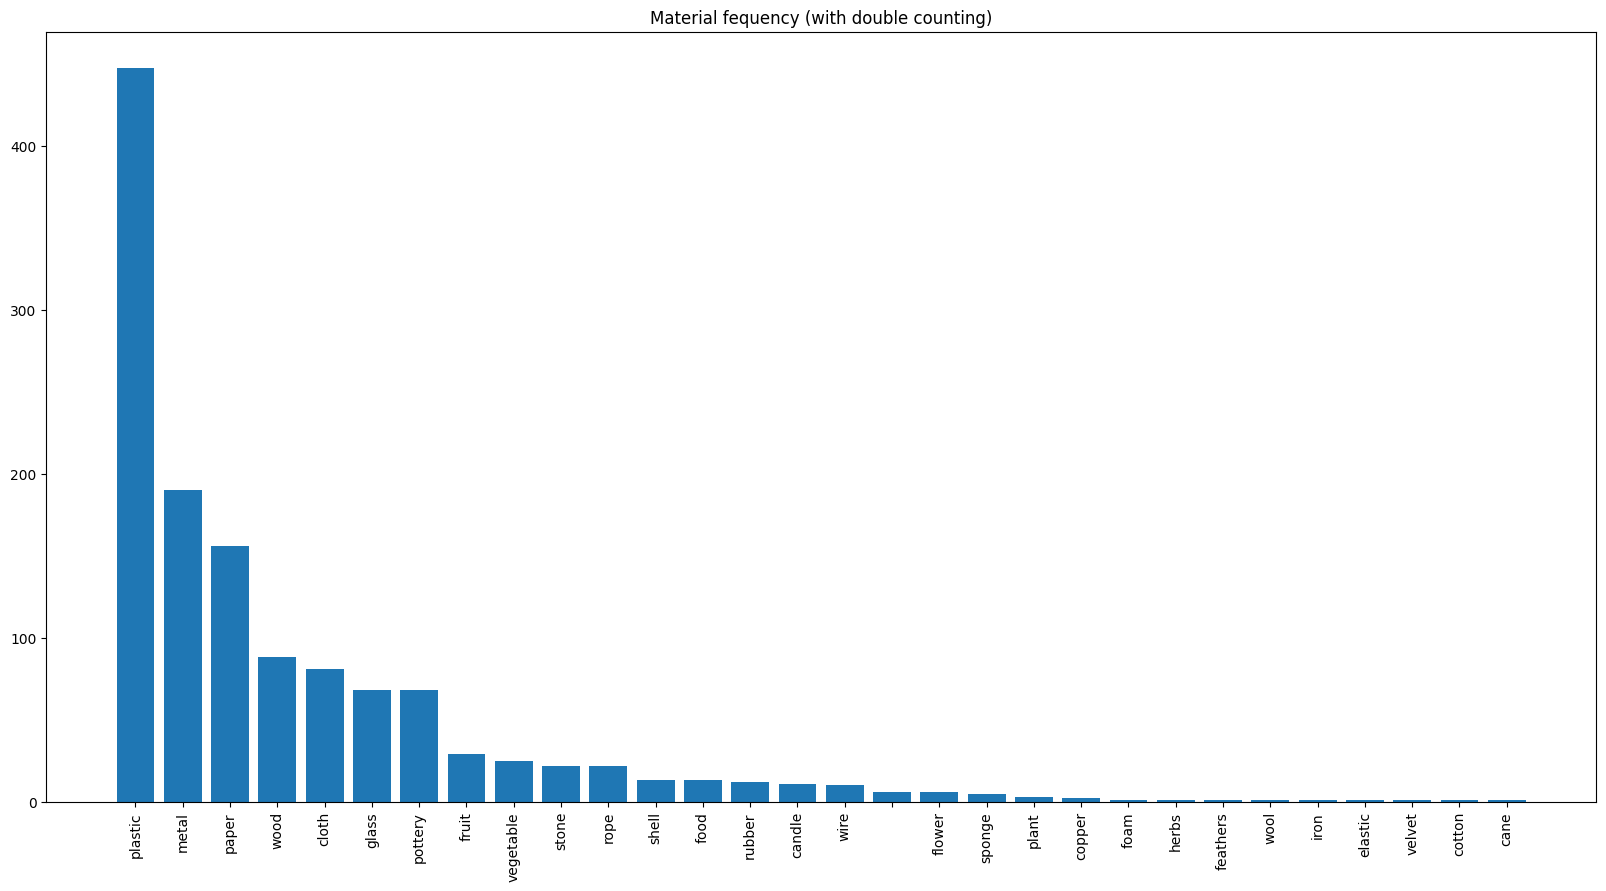

In [29]:
#histogram of material count
plt.figure(figsize=(20,10))
plt.bar([i[0] for i in material_count], [i[1] for i in material_count])
plt.title('Material fequency (with double counting)')
plt.xticks(rotation=90)
plt.show()


In [24]:
#use the top 4 materials
top_materials = [i[0] for i in material_count[:4]]
top_materials

['plastic', 'metal', 'paper', 'wood']

In [25]:
#count of each material with single count
material_top4_count = {}
for i in top_materials:
    material_top4_count[i] = 0
for mat_list in annotations['Material']:
    if len(mat_list) == 1:
        if mat_list[0] in top_materials:
            material_top4_count[mat_list[0]] += 1
    else:
        #if more than one material, only count if material is only contained in one category of top_materials
        if ('plastic' in mat_list) and ('metal' not in mat_list) and ('paper' not in mat_list) and ('wood' not in mat_list):
            material_top4_count['metal'] += 1
        elif ('metal' in mat_list) and ('plastic' not in mat_list) and ('paper' not in mat_list) and ('wood' not in mat_list):
            material_top4_count['plastic'] += 1
        elif ('paper' in mat_list) and ('metal' not in mat_list) and ('plastic' not in mat_list) and ('wood' not in mat_list):
            material_top4_count['paper'] += 1
        elif ('wood' in mat_list) and ('metal' not in mat_list) and ('paper' not in mat_list) and ('plastic' not in mat_list):
            material_top4_count['wood'] += 1
material_top4_count

{'plastic': 318, 'metal': 98, 'paper': 80, 'wood': 76}

In [26]:
#sort material count
material_top4_count = sorted(material_top4_count.items(), key=lambda x: x[1], reverse=True)

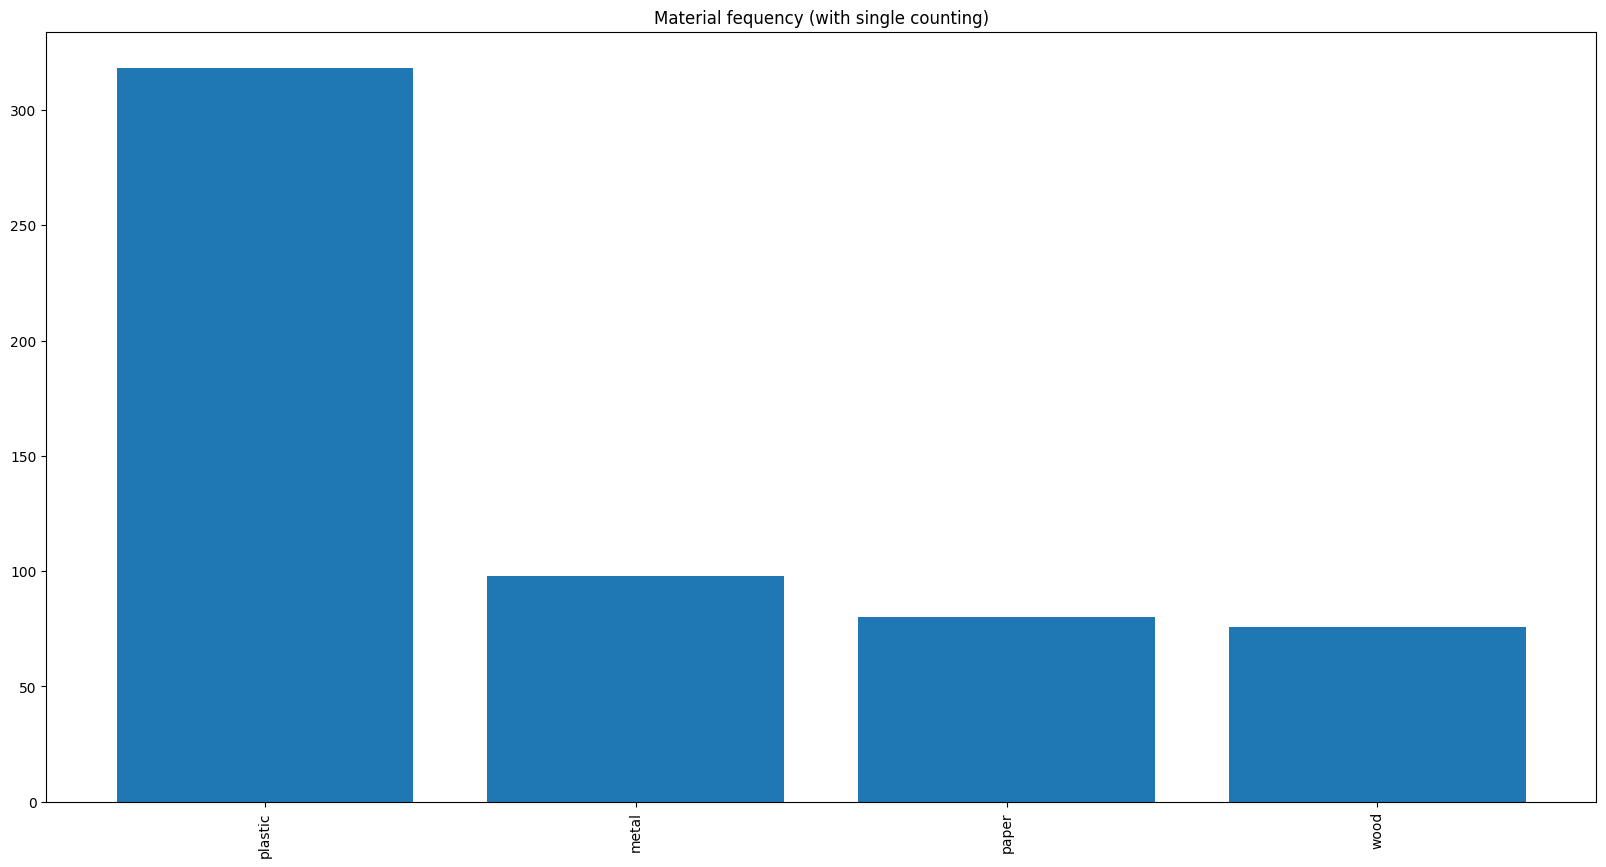

In [27]:
#histogram of material count
plt.figure(figsize=(20,10))
plt.bar([i[0] for i in material_top4_count], [i[1] for i in material_top4_count])
plt.title('Material fequency (with single counting)')
plt.xticks(rotation=90)
plt.show()

In [30]:
#add wood and paper into wood,paper category
material_top4_count[2] = ('wood,paper', material_top4_count[2][1] + material_top4_count[3][1])
material_top4_count.pop(3)
material_top4_count

[('plastic', 318), ('metal', 98), ('wood,paper', 156)]

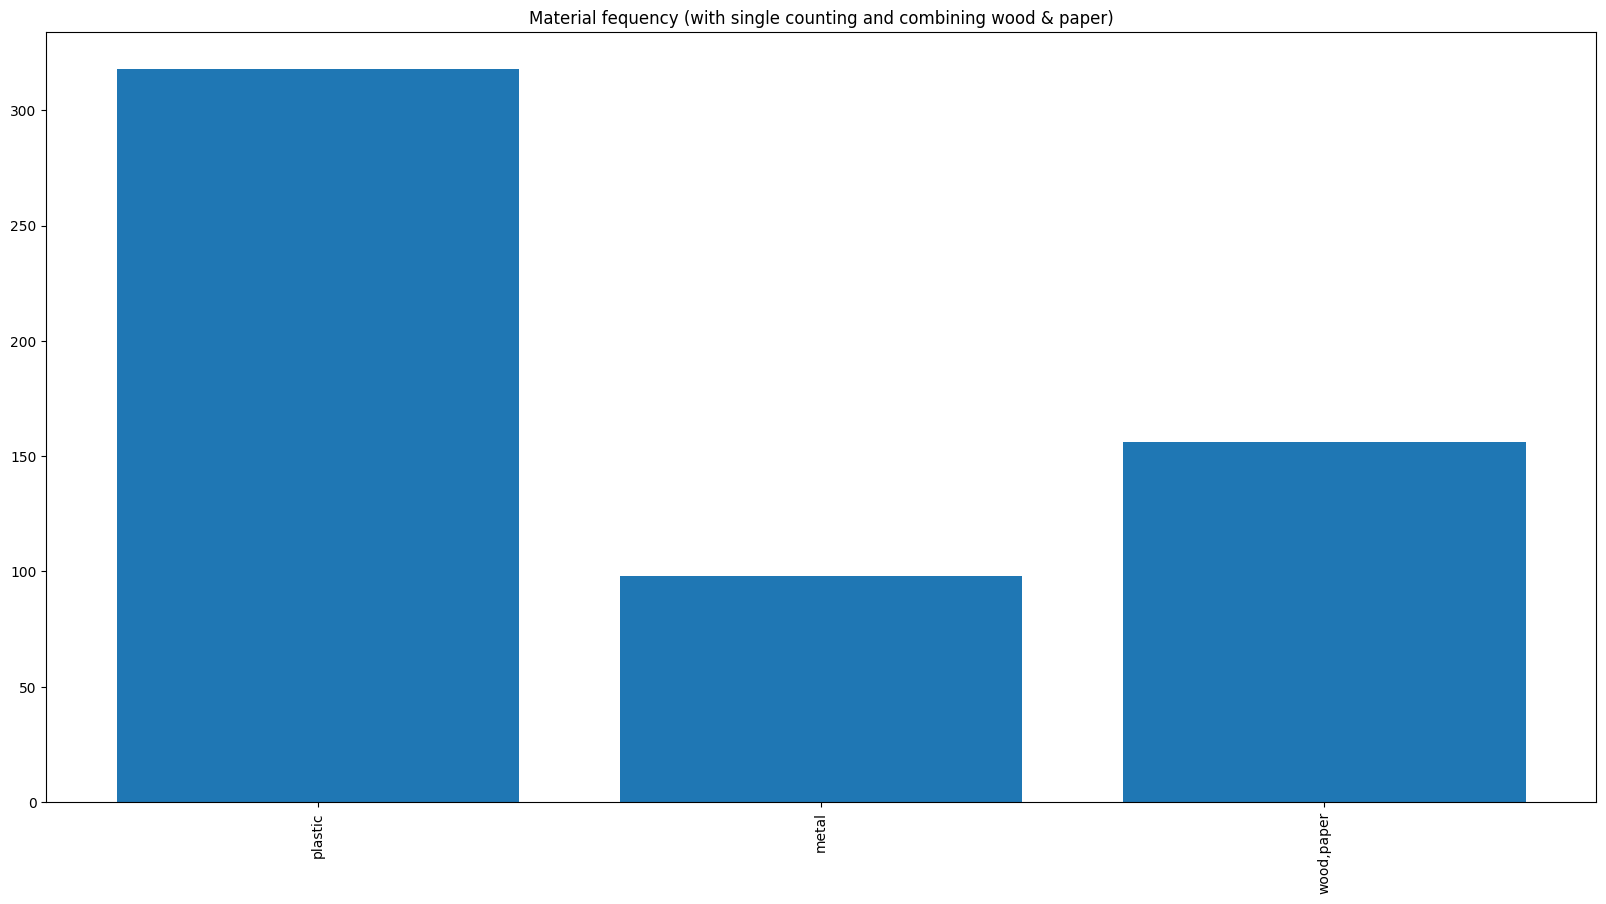

In [32]:
#histogram of material count (top 3)
plt.figure(figsize=(20,10))
plt.bar([i[0] for i in material_top4_count[:3]], [i[1] for i in material_top4_count[:3]])
plt.title('Material fequency (with single counting and combining wood & paper)')
plt.xticks(rotation=90)
plt.show()